In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv("IMDB Dataset.csv")
data =data.replace({'positive': 1, 'negative':0})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_33264\2666918190.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data =data.replace({'positive': 1, 'negative':0})


In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [5]:
x=data['review']
y=data['sentiment']

In [6]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(x)
x_seq = tokenizer.texts_to_sequences(x)

In [8]:
x_pad =pad_sequences(x_seq, maxlen=500)


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_pad, y, test_size=0.2, random_state=42)

In [10]:
scaler= StandardScaler()
x_train = scaler.fit_transform(x_train.astype('float32'))
x_test=scaler.transform(x_test.astype('float32'))

In [11]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=500))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2,verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.5015 - loss: 0.7009 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5024 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5033 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.5056 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.5000 - v

In [14]:
y_pred=(model.predict(x_test) > 0.5).astype("int32")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [19]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.4961


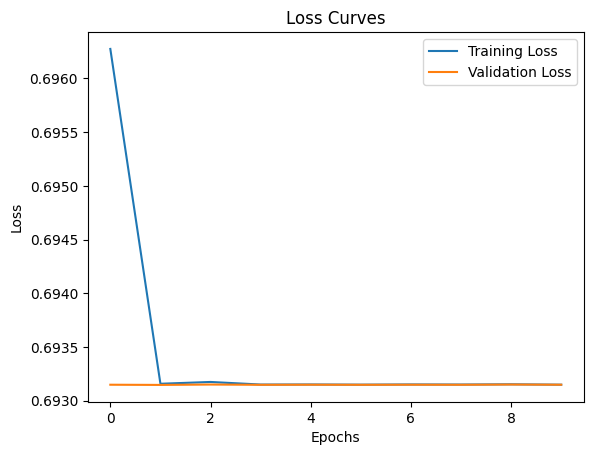

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curves")
plt.legend()
plt.show()